In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [8]:
site = "B"

In [3]:
# load the data
data_directory = ""
data_name = site + "_TurbineData.csv"
flag_name = site + "_FullPerformanceFlag.csv"

data = pd.read_csv(os.path.join(os.getcwd(), data_directory, data_name))
flag = pd.read_csv(os.path.join(os.getcwd(), data_directory, flag_name))

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474345 entries, 0 to 474344
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ts                             474345 non-null  object 
 1   instanceID                     474345 non-null  object 
 2   AoARel                         397590 non-null  float64
 3   bladePitch                     397591 non-null  float64
 4   bladePitchMax                  397591 non-null  float64
 5   bladePitchMin                  397591 non-null  float64
 6   bladePitchSetPoint             0 non-null       float64
 7   bladePitchStd                  0 non-null       float64
 8   cP                             397590 non-null  float64
 9   generatorTorque                391183 non-null  float64
 10  rotorTorque                    378512 non-null  float64
 11  TI                             397590 non-null  float64
 12  TSR                           

In [5]:
flag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474345 entries, 0 to 474344
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ts          474345 non-null  object
 1   instanceID  474345 non-null  object
 2   value       474345 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 10.9+ MB


In [31]:
turbine_count = data['instanceID'].nunique()
turbine_name = data['instanceID'].unique()
print(turbine_count)
print(turbine_name)

9
['B_WTG01' 'B_WTG02' 'B_WTG03' 'B_WTG04' 'B_WTG05' 'B_WTG06' 'B_WTG07'
 'B_WTG08' 'B_WTG09']


**Comment:** data size: 474345 x 26; flag size: 474345 x 3. There are 9 turbines. 366 x 9 x 24 x 6 + 9 = 474345. No missing rows.

In [11]:
# add the boolean flag signal to the data
data['value'] = flag['value']

# drop irrelevant columns
data = data.drop(columns = ['AoARel', 'bladePitch', 'bladePitchMax',
       'bladePitchMin', 'bladePitchSetPoint', 'bladePitchStd', 'cP',
       'generatorTorque', 'rotorTorque', 'TSR',
       'Wind_direction', 'Nacelle_position', 'Nacelle_temperature',
       'Rotor_speed', 'Power_Minimum', 'Power_Maximum', 'Generator_RPM', 'Generator_RPM_Max',
       'Generator_RPM_Min'])

In [12]:
# Add month and day
data['ts'] = pd.to_datetime(data['ts'], format = '%d-%b-%Y %H:%M:%S')
data['Month'] = data.ts.dt.month
data['Day'] = data.ts.dt.day
data['Hour'] = data.ts.dt.hour

In [13]:
data.columns.values

array(['ts', 'instanceID', 'TI', 'Wind_speed', 'Power',
       'Ambient_temperature', 'Wind_speed_Standard_deviation', 'value',
       'Month', 'Day', 'Hour'], dtype=object)

In [15]:
# Rearrange columns
data = data.reindex(columns = ['ts',  'Month' , 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_Standard_deviation', 'TI', 
                'Ambient_temperature', 'Power', 'value'])

# rename columns 
data.columns = ['ts',  'Month', 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_sd', 'TI', 
                'Temperature', 'Power', 'value']

In [16]:
data.sample(5, random_state = 10)

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power,value
18651,2020-01-15 09:20:00,1,15,9,B_WTG04,11.992290,1.231379,10.268089,6.669166,2060.033645,1
189735,2020-05-26 09:30:00,5,26,9,B_WTG07,6.381704,0.597067,9.355916,16.942373,478.199461,1
290310,2020-08-12 00:00:00,8,12,0,B_WTG07,NaN,NaN,NaN,NaN,NaN,0
106677,2020-03-23 07:30:00,3,23,7,B_WTG01,7.526785,0.708597,9.414338,2.705833,875.260884,1
133069,2020-04-12 16:10:00,4,12,16,B_WTG05,5.494958,0.690770,12.570986,9.430000,306.851706,1


### Plot time series

In [17]:
data_01 = data[data['instanceID'] == site + '_WTG01']

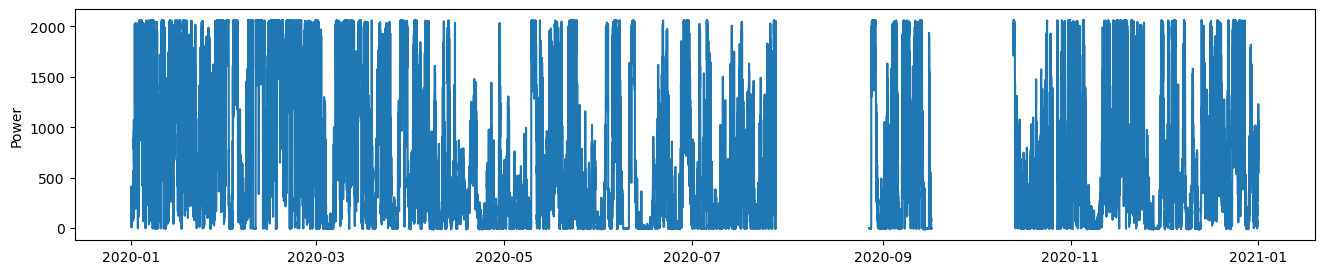

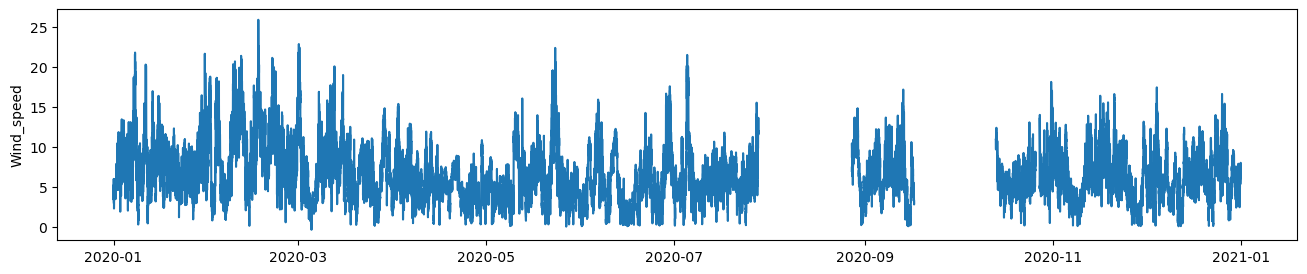

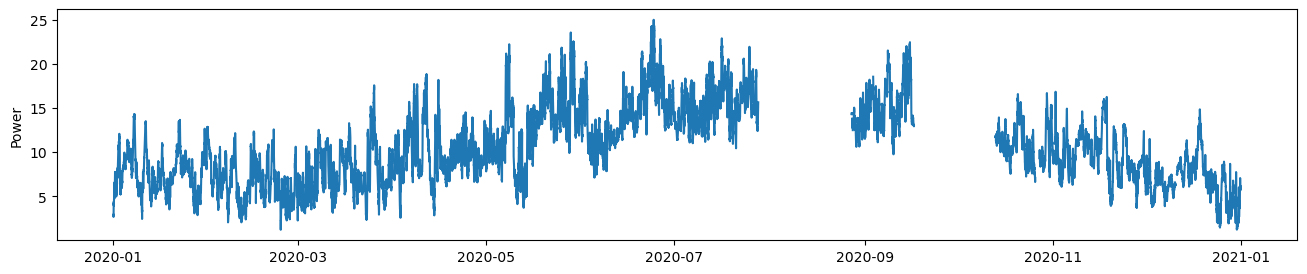

In [19]:
fig, ax = plt.subplots(figsize = (16,3))
ax.plot(data_01['ts'], data_01['Power'])
ax.set_ylabel('Power')
plt.show()

fig, ax = plt.subplots(figsize = (16,3))
ax.plot(data_01['ts'], data_01['Wind_speed'])
ax.set_ylabel('Wind_speed')
plt.show()

fig, ax = plt.subplots(figsize = (16,3))
ax.plot(data_01['ts'], data_01['Temperature'])
ax.set_ylabel('Power')
plt.show()

### Full performance data

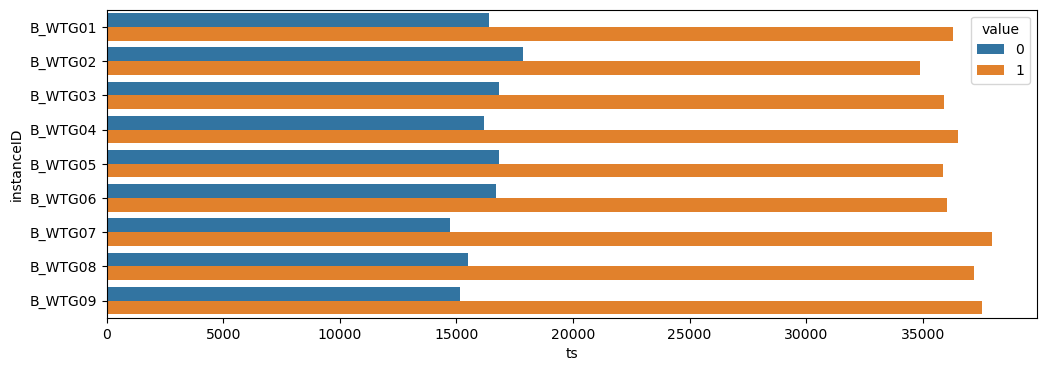

In [22]:
# Plot bar chart of performance flag for each turbine
bar = data.groupby(by=['instanceID','value']).count().reset_index()
fig, ax = plt.subplots(figsize = (12,4))
ax = sns.barplot(x="ts", y="instanceID", hue = "value", data=bar, orient = "h")
plt.show()

In [23]:
# only select rows with flag value = 1
data_clean = data[data['value'] == 1]

# drop irrelevant columns 
data_clean = data_clean.drop(columns = ['value'])

In [24]:
data_clean.describe()

,Month,Day,Hour,Wind_speed,Wind_speed_sd,TI,Temperature,Power
count,328252.000000,328252.000000,328252.000000,328252.000000,328252.000000,328252.000000,328252.000000,328252.000000
mean,5.932719,15.791392,11.575366,7.517741,1.001303,13.677968,10.133740,908.261401
std,3.695941,8.697013,6.791063,3.248287,0.495138,4.378230,4.177634,724.194649
min,1.000000,1.000000,0.000000,1.711460,0.000000,0.000000,0.964167,2.055218
25%,3.000000,8.000000,6.000000,5.088602,0.645140,10.516176,6.995833,252.361115
50%,5.000000,16.000000,12.000000,6.888239,0.900457,13.065740,9.526469,690.089911
75%,10.000000,23.000000,17.000000,9.412493,1.236902,16.184659,12.865833,1638.310585
max,12.000000,31.000000,23.000000,23.581854,5.406439,59.763393,25.416667,2068.491032


In [25]:
# check for null entries
data_clean[data_clean.isnull().any(axis=1)]

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power


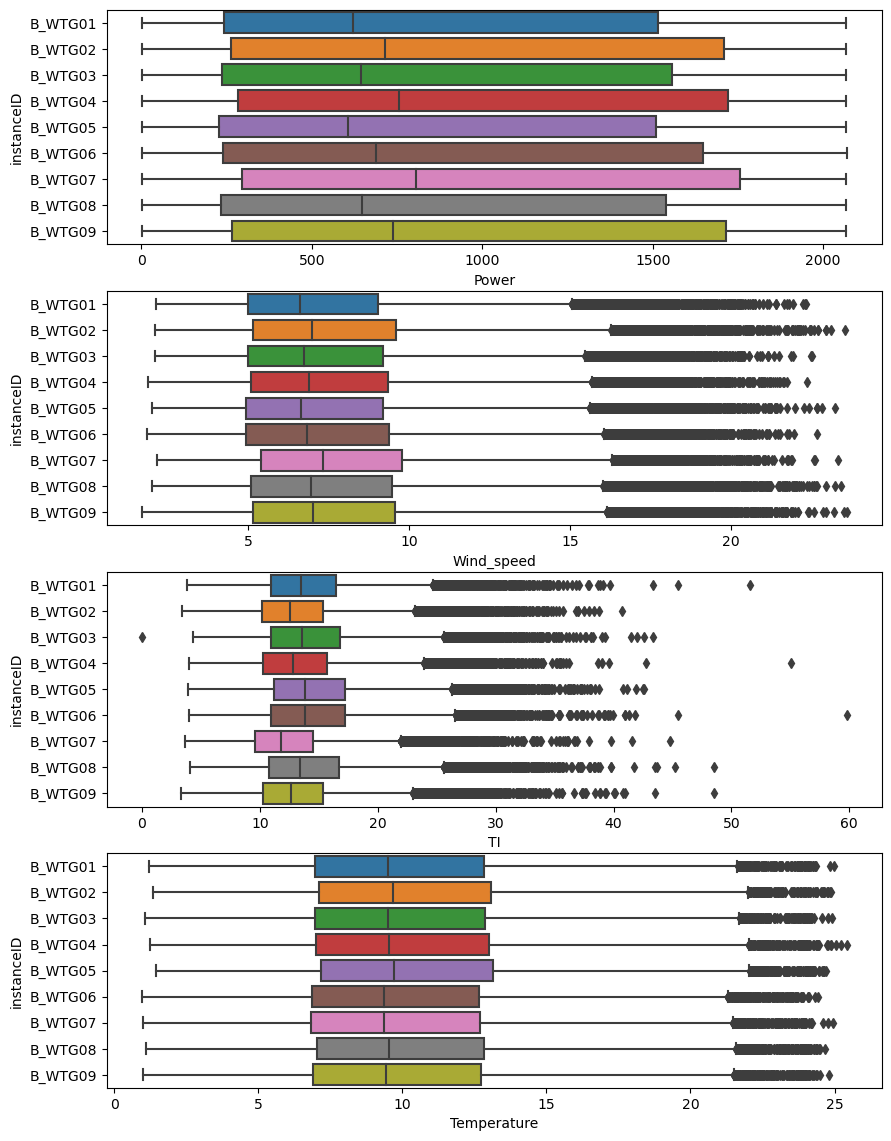

In [66]:
# Make boxplot
fig, ax = plt.subplots(4, figsize = (10,14))

features = [ 'Power','Wind_speed', 'TI', 'Temperature']

for i in range (0,4):
    sns.boxplot(x = features[i], y = 'instanceID', data = data_clean, orient = 'h', ax = ax[i])
    ax[i].set(xlabel = features[i], ylabel = 'instanceID')
    
plt.show()

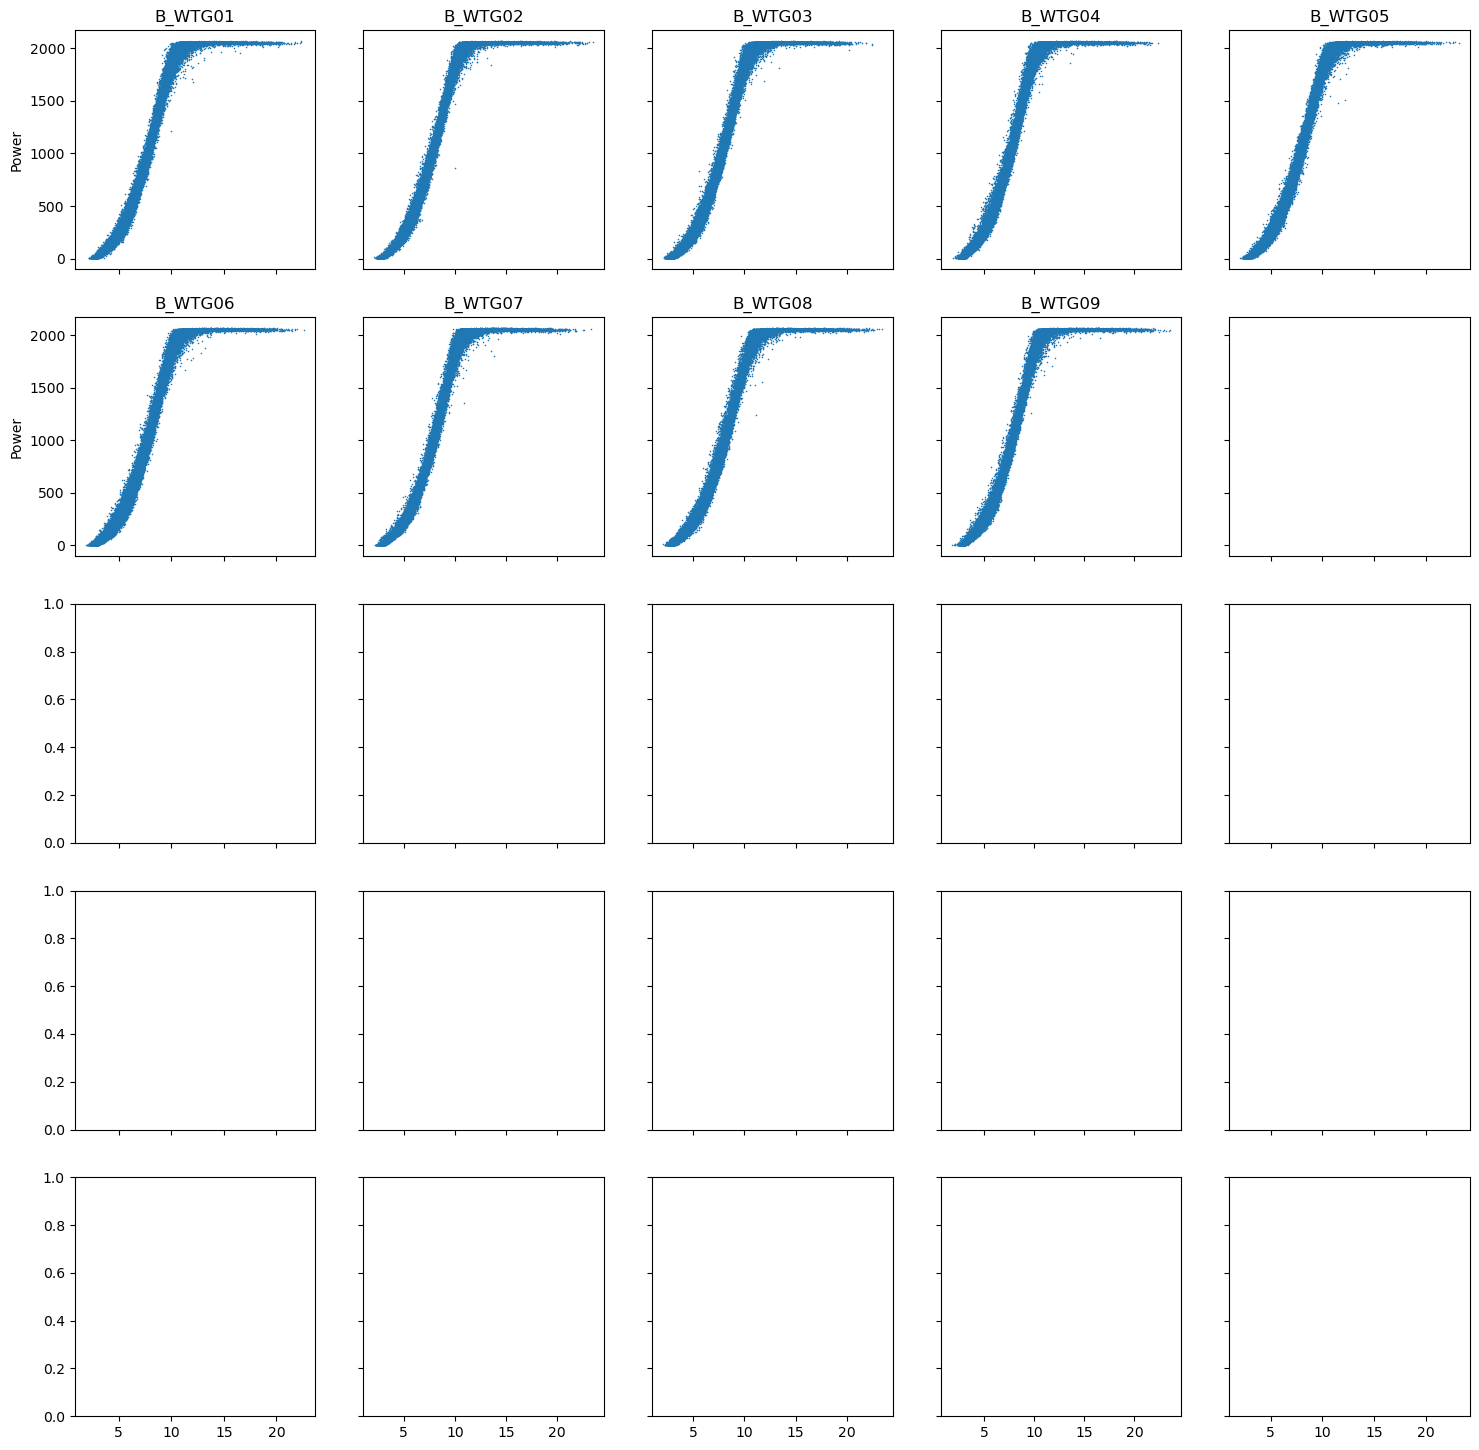

In [57]:
# Plot power curve for each turbine
fig, ax = plt.subplots(5,5, figsize=(18,18), sharex='col', sharey='row');

i = 0
for r in range (2):
        for c in range (5):
            data_turbine = data_clean[data_clean['instanceID'] == turbine_name[i]]
            sns.scatterplot(x = data_turbine['Wind_speed'], y = data_turbine['Power'], ax = ax[r][c], s = 1, edgecolor = None)
            ax[r][c].set_title(turbine_name[i])
            ax[r][c].set_xlabel("Wind_speed") 
            ax[r][c].set_ylabel("Power") 
            i += 1
            if i >= turbine_count:
                break

plt.show()

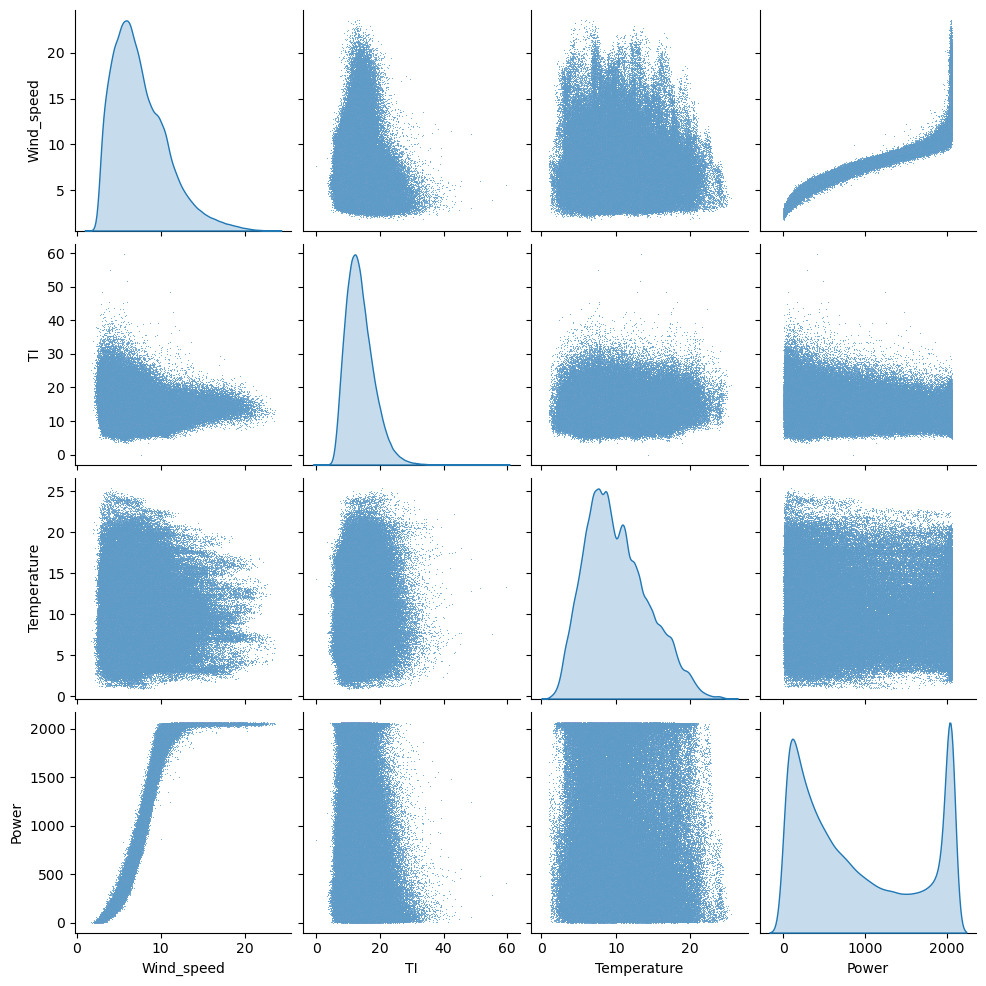

In [58]:
# Make pairplot
sns.pairplot(data_clean, vars = ["Wind_speed", "TI", "Temperature", "Power"], 
             diag_kind = 'kde', plot_kws={'s' : 0.5})
plt.show()

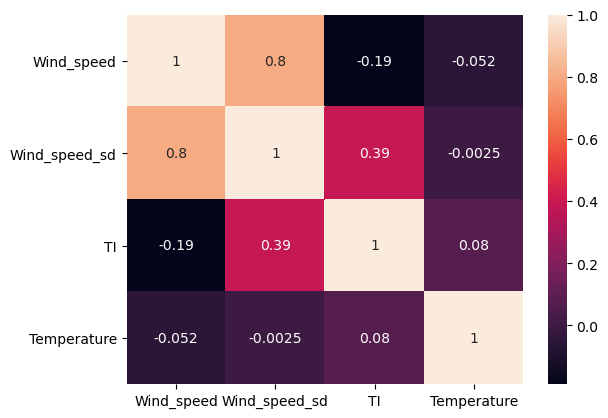

In [59]:
# Plot correlation between features
relation = ['Wind_speed', 'Wind_speed_sd', 'TI', 'Temperature']
sns.heatmap(data_clean[relation].corr(), annot=True)
plt.show()

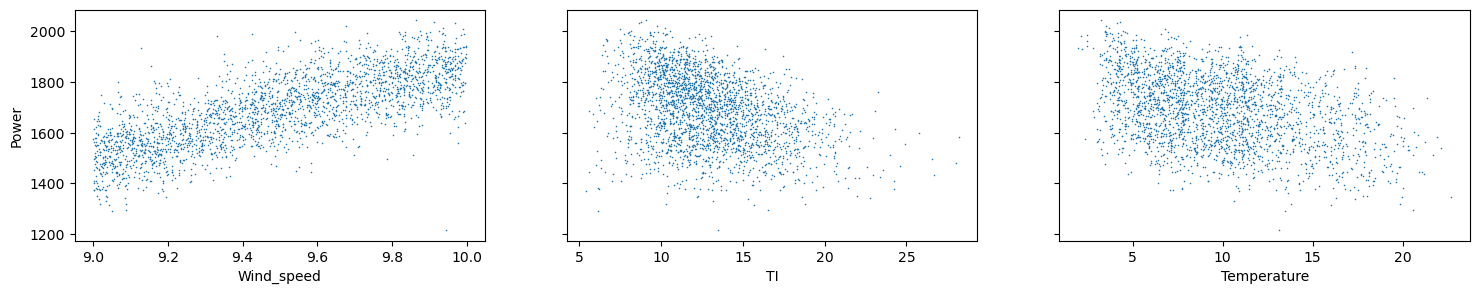

In [62]:
# Make plots for specific wind speed range
data_clean_01 = data_clean[(data_clean['instanceID'] == site + "_WTG01") & (data_clean['Wind_speed'] >= 9) 
                           & (data_clean['Wind_speed'] <= 10)] 

features = ["Wind_speed", "TI", "Temperature"]

fig, ax = plt.subplots(1,3, figsize=(18,3), sharey='row')

for c in range(3):
    sns.scatterplot(x = data_clean_01[features[c]], y = data_clean_01['Power'], ax = ax[c], s = 1, edgecolor = None)
    ax[c].set_xlabel(features[c]) 
    ax[c].set_ylabel("Power") 

plt.show()

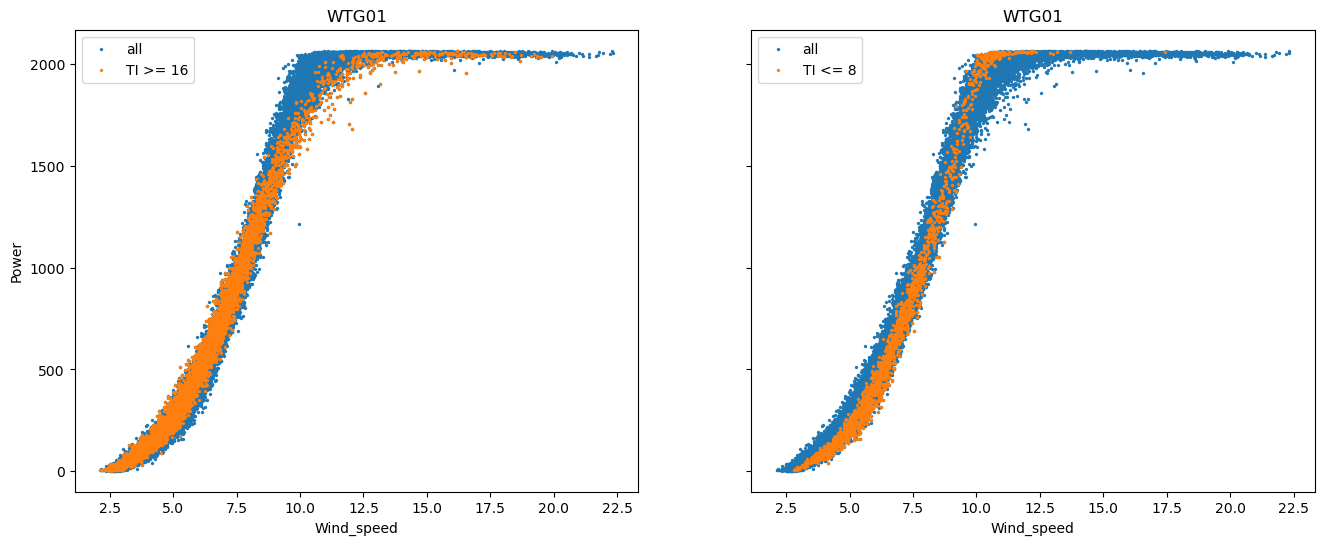

In [63]:
# Plot power curve of difference TI range
WTG01 = data_clean[(data_clean['instanceID'] == site + '_WTG01')]
WTG01_a = WTG01[(WTG01['TI'] >= 18)] 
WTG01_b = WTG01[(WTG01['TI'] <= 8)] 

fig, ax = plt.subplots(1,2, figsize=(16,6), sharey='row')

sns.scatterplot(x = WTG01['Wind_speed'], y = WTG01['Power'], ax = ax[0], s = 5, label = 'all', edgecolor = None)
sns.scatterplot(x = WTG01_a['Wind_speed'], y = WTG01_a['Power'], ax = ax[0], s = 5 , label = 'TI >= 16', edgecolor = None)
ax[0].set_xlabel('Wind_speed') 
ax[0].set_ylabel("Power") 
ax[0].set_title("WTG01") 

sns.scatterplot(x = WTG01['Wind_speed'], y = WTG01['Power'], ax = ax[1], s = 5, label = 'all', edgecolor = None)
sns.scatterplot(x = WTG01_b['Wind_speed'], y = WTG01_b['Power'], ax = ax[1], s = 5, label = 'TI <= 8', edgecolor = None)
ax[1].set_xlabel('Wind_speed') 
ax[1].set_ylabel("Power") 
ax[1].set_title("WTG01") 

plt.show()

### Export clean data

In [64]:
data_clean.to_csv("")